In [1]:
#Loading required libraries
import pandas as pd
import numpy as np
import gc                        
gc.enable()

In [51]:
#Reading in the datasets
orders = pd.read_csv('data/orders.csv' )
order_products_train = pd.read_csv('data/order_products__train.csv')
order_products_prior = pd.read_csv('data/order_products__prior.csv')
products = pd.read_csv('data/products.csv')
aisles = pd.read_csv('data/aisles.csv')
departments = pd.read_csv('data/departments.csv')

In [3]:
df_list=[orders,
         order_products_train,
         order_products_prior,
         products,
         aisles,
         departments]

for i in df_list:
    print(i.head())

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
   order_id  product_id  add_to_cart_order  r

In [4]:
order_products_prior.shape[0]/order_products_train.shape[0]

23.42488139319393

In [5]:
order_products_train.shape[0]

1384617

In [6]:
#Converting the characthers to categorical values
aisles['aisle'] = aisles['aisle'].astype('category')
departments['department'] = departments['department'].astype('category')
orders['eval_set'] = orders['eval_set'].astype('category')
products['product_name'] = products['product_name'].astype('category')

In [7]:
op = orders.merge(order_products_prior, on='order_id', how='inner')

## EDA
Through a series of graphs will explore the various tables

In [8]:
op1=op[op.reordered==1]

In [9]:
op1.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered'],
      dtype='object')

In [10]:
op.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [11]:
product_total=op.groupby('product_id')['product_id'].count().to_frame('p_total').reset_index()
top_product_total=product_total.sort_values(by=['p_total'],ascending=False)
top_25_products=top_product_total.head(25)


In [12]:
top_25_products

,product_id,p_total
24848,24852,472565
13172,13176,379450
21133,21137,264683
21899,21903,241921
47198,47209,213584
47755,47766,176815
47615,47626,152657
16793,16797,142951
26204,26209,140627
27839,27845,137905


In [13]:
#Getting the product names
top_25_products_ = pd.merge(top_25_products, products[['product_id','product_name']], on=['product_id', 'product_id'], how='left')

In [14]:
top_25_products_

,product_id,p_total,product_name
0,24852,472565,Banana
1,13176,379450,Bag of Organic Bananas
2,21137,264683,Organic Strawberries
3,21903,241921,Organic Baby Spinach
4,47209,213584,Organic Hass Avocado
5,47766,176815,Organic Avocado
6,47626,152657,Large Lemon
7,16797,142951,Strawberries
8,26209,140627,Limes
9,27845,137905,Organic Whole Milk


''

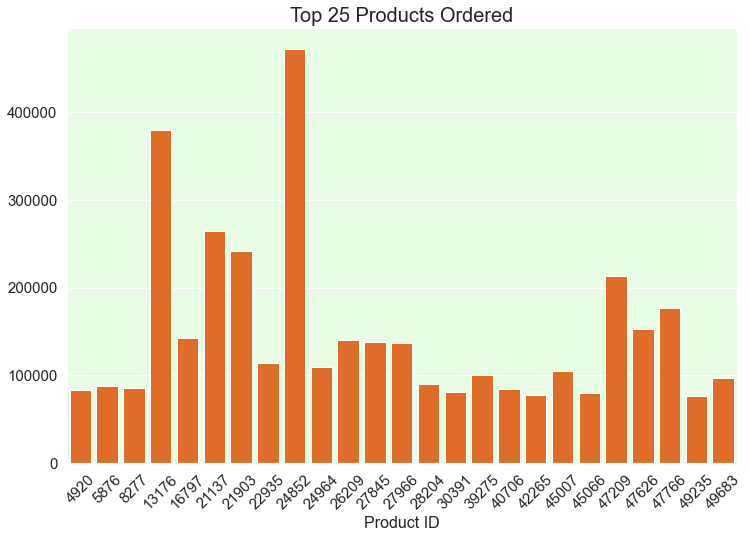

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#E9FDE6'})
sns.barplot(data=top_25_products_, x="product_id", y="p_total",color='#FD6609')

plt.title("Top 25 Products Ordered", fontsize=20)
plt.xlabel('Product ID', fontsize=16)
plt.xticks(fontsize=15,rotation=45)
#plt.set_xticklabels( ('A', 'B','C') )
plt.ylabel('', fontsize=16)
plt.yticks(fontsize=15)
#plt.grid(None)
;

To get the products that have been reordered the most number of times:
1. Create a subset of the op dataframe for reordered =1
2. Groupby product_id, count product_id
3. Sort by descending

Creating a df for the top 25 reordered products

In [16]:
#Creating a df for the top 25 reordered products
op1.columns
product_total_r=op1.groupby('product_id')['product_id'].count().to_frame('p_total').reset_index()
top_product_total_r=product_total_r.sort_values(by=['p_total'],ascending=False)
top_25_products_r=top_product_total_r.head(25)

In [17]:
top_25_products_r.head()

,product_id,p_total
22680,24852,398609
11997,13176,315913
19282,21137,205845
19973,21903,186884
43048,47209,170131


Top 25 reordered products

''

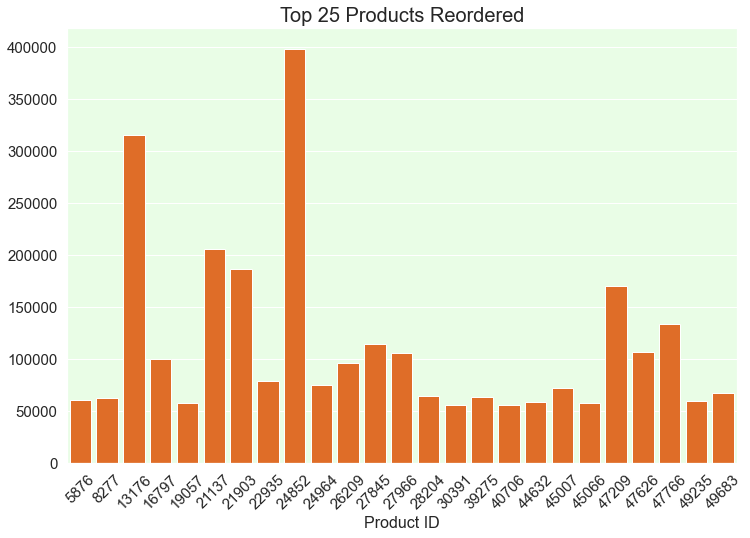

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#E9FDE6'})
sns.barplot(data=top_25_products_r, x="product_id", y="p_total",color='#FD6609')

plt.title("Top 25 Products Reordered", fontsize=20)
plt.xlabel('Product ID', fontsize=16)
plt.xticks(fontsize=15,rotation=45)
plt.ylabel('', fontsize=16)
plt.yticks(fontsize=15)
;

Distribution of orders by days of the week

''

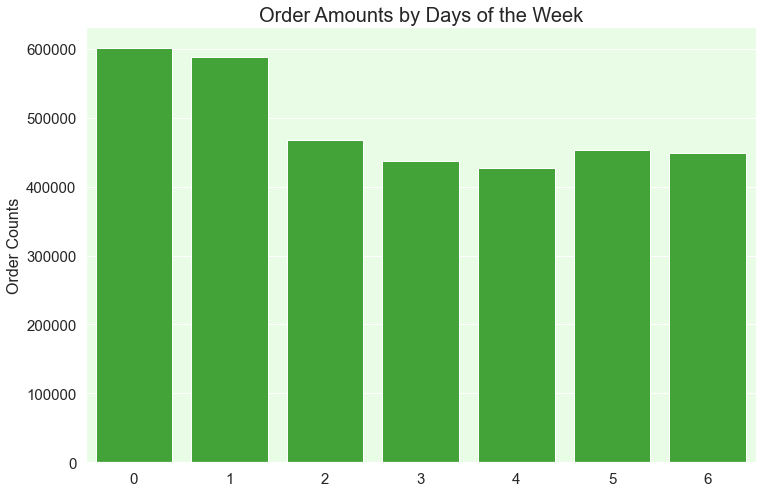

In [19]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#E9FDE6'})
sns.countplot(x=orders.order_dow, color='#35B426')

plt.title("Order Amounts by Days of the Week", fontsize=20)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)
;

Distribution by hours of the day

''

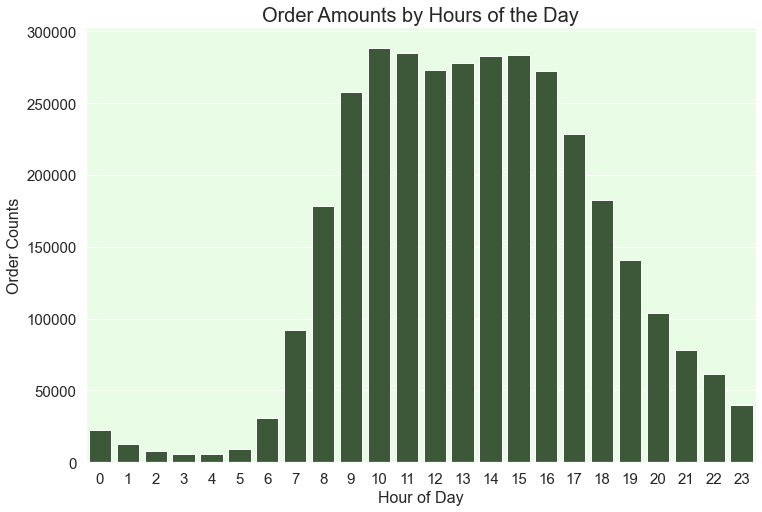

In [20]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#E9FDE6'})
sns.countplot(x=orders.order_hour_of_day, color='#385D33')

plt.title("Order Amounts by Hours of the Day", fontsize=20)
plt.xlabel('Hour of Day', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)
;

## Predictor Variables
Generating variables to encapsulate:
1. Total number of orders per user
2. Total number of times a product has been ordered
3. Total number of times a product has been ordered by a user

In [21]:
#1.1 Total number of orders per user
user = op.groupby('user_id')['order_number'].max().to_frame('u_total_orders').reset_index()
print(user.head())
print(type(user))

#1.2 How frequent a customer has reordered products
u_reorder = op.groupby('user_id')['reordered'].mean().to_frame('u_reordered_ratio').reset_index()
u_reorder.head()

#tryu=op.groupby('user_id')['order_number'].transform('max').drop_duplicates().to_frame('u_total_orders') 
#print(tryu.head()) 
#print(type(tryu))

#try2=op.groupby('user_id').size().drop_duplicates()
#print(try2.head())
#print(type(try2))

   user_id  u_total_orders
0        1              10
1        2              14
2        3              12
3        4               5
4        5               4
<class 'pandas.core.frame.DataFrame'>


,user_id,u_reordered_ratio
0,1,0.694915
1,2,0.476923
2,3,0.625000
3,4,0.055556
4,5,0.378378


In [22]:
user = user.merge(u_reorder, on='user_id', how='left')

del u_reorder
gc.collect()

user.head()

,user_id,u_total_orders,u_reordered_ratio
0,1,10,0.694915
1,2,14,0.476923
2,3,12,0.625000
3,4,5,0.055556
4,5,4,0.378378


In [23]:
#2.1 Total number of times a product has been ordered
#product_total=op.groupby('product_id')['product_id'].count().to_frame('p_total').reset_index()
#product_total.head()

#2.2 How frequently a product has been reordered
p_reorder = op.groupby('product_id').filter(lambda x: x.shape[0] >40)
#p_reorder.head()

p_reorder = p_reorder.groupby('product_id')['reordered'].mean().to_frame('p_reordered_ratio').reset_index()
p_reorder.head()


,product_id,p_reordered_ratio
0,1,0.613391
1,2,0.133333
2,3,0.732852
3,4,0.446809
4,8,0.503030


In [24]:
product_total = product_total.merge(p_reorder, on='product_id', how='left')

#delete the reorder DataFrame
del p_reorder
gc.collect()

product_total.head()

,product_id,p_total,p_reordered_ratio
0,1,1852,0.613391
1,2,90,0.133333
2,3,277,0.732852
3,4,329,0.446809
4,5,15,NaN


In [25]:
product_total['p_reordered_ratio'] = product_total['p_reordered_ratio'].fillna(value=0)
product_total.head()

,product_id,p_total,p_reordered_ratio
0,1,1852,0.613391
1,2,90,0.133333
2,3,277,0.732852
3,4,329,0.446809
4,5,15,0.000000


In [26]:
#3.1 Total number of times a product has been ordered by a user
uxp=op.groupby(['user_id','product_id'])[['product_id']].count().rename(columns={"product_id":"u_p_total"}).reset_index()
uxp.head()

,user_id,product_id,u_p_total
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [27]:
#3.2 Frequency of a product being reordered by a user
#u_p_reorder = op.groupby(['user_id','product_id'])['reordered'].mean().to_frame('u_p_reordered_ratio').reset_index()
#u_p_reorder.head()

times = op.groupby(['user_id', 'product_id'])[['order_id']].count()
times.columns = ['Times_Bought_N']
times.reset_index()
times.head()


Times_Bought_N
user_id product_id                
1       196                     10
        10258                    9
        10326                    1
        12427                   10
        13032                    3

In [28]:
total_orders = op.groupby('user_id')['order_number'].max().to_frame('total_orders')
total_orders.head()

,total_orders
user_id,
1,10
2,14
3,12
4,5
5,4


In [29]:
first_order_no = op.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_number')
first_order_no  = first_order_no.reset_index()
first_order_no.head()

,user_id,product_id,first_order_number
0,1,196,1
1,1,10258,2
2,1,10326,5
3,1,12427,1
4,1,13032,2


In [30]:
span = pd.merge(total_orders, first_order_no, on='user_id', how='right')
span.head()

,user_id,total_orders,product_id,first_order_number
0,1,10,196,1
1,1,10,10258,2
2,1,10,10326,5
3,1,10,12427,1
4,1,10,13032,2


In [31]:
#opu1=op.loc[op['user_id']==1]
#opu1.loc[opu1['product_id']==196]
#opu1

In [32]:
# The +1 includes in the difference the first order were the product has been purchased
span['Order_Range_D'] = span.total_orders - span.first_order_number + 1
span.head()

,user_id,total_orders,product_id,first_order_number,Order_Range_D
0,1,10,196,1,10
1,1,10,10258,2,9
2,1,10,10326,5,6
3,1,10,12427,1,10
4,1,10,13032,2,9


In [33]:
uxp_ratio = pd.merge(times, span, on=['user_id', 'product_id'], how='left')
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D
0,1,196,10,10,1,10
1,1,10258,9,10,2,9
2,1,10326,1,10,5,6
3,1,12427,10,10,1,10
4,1,13032,3,10,2,9


In [34]:
uxp_ratio['uxp_reorder_ratio'] = uxp_ratio.Times_Bought_N / uxp_ratio.Order_Range_D
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D,uxp_reorder_ratio
0,1,196,10,10,1,10,1.000000
1,1,10258,9,10,2,9,1.000000
2,1,10326,1,10,5,6,0.166667
3,1,12427,10,10,1,10,1.000000
4,1,13032,3,10,2,9,0.333333


In [35]:
uxp_ratio = uxp_ratio.drop(['Times_Bought_N', 'total_orders', 'first_order_number', 'Order_Range_D'], axis=1)
uxp_ratio.head()

,user_id,product_id,uxp_reorder_ratio
0,1,196,1.000000
1,1,10258,1.000000
2,1,10326,0.166667
3,1,12427,1.000000
4,1,13032,0.333333


In [36]:
#Remove temporary DataFrames
del [times, first_order_no, span]

In [37]:
uxp = uxp.merge(uxp_ratio, on=['user_id', 'product_id'], how='left')

del uxp_ratio
uxp.head()

,user_id,product_id,u_p_total,uxp_reorder_ratio
0,1,196,10,1.000000
1,1,10258,9,1.000000
2,1,10326,1,0.166667
3,1,12427,10,1.000000
4,1,13032,3,0.333333


In [38]:
#4. Merging all features
#Store the results on a new DataFrame
data = uxp.merge(user, on='user_id', how='left')
data.head()


,user_id,product_id,u_p_total,uxp_reorder_ratio,u_total_orders,u_reordered_ratio
0,1,196,10,1.000000,10,0.694915
1,1,10258,9,1.000000,10,0.694915
2,1,10326,1,0.166667,10,0.694915
3,1,12427,10,1.000000,10,0.694915
4,1,13032,3,0.333333,10,0.694915


In [39]:
#Merge uxp & user features (the new DataFrame) with prd features
data = data.merge(product_total, on='product_id', how='left')
data.head()

,user_id,product_id,u_p_total,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total,p_reordered_ratio
0,1,196,10,1.000000,10,0.694915,35791,0.776480
1,1,10258,9,1.000000,10,0.694915,1946,0.713772
2,1,10326,1,0.166667,10,0.694915,5526,0.652009
3,1,12427,10,1.000000,10,0.694915,6476,0.740735
4,1,13032,3,0.333333,10,0.694915,3751,0.657158


In [40]:
del op, user, product_total, uxp
gc.collect()

0

# 3. Creating the test and train dataset

## 3.1 Train Dataset
Until now we used the prior dataset for feature generation. Now we will merge those features and create our train and test set.

In [41]:
# In two steps keep only the future orders from all customers: train & test 
orders_future = orders[((orders.eval_set=='train') | (orders.eval_set=='test'))]
orders_future = orders_future[ ['user_id', 'eval_set', 'order_id'] ]
orders_future.head(10)

,user_id,eval_set,order_id
10,1,train,1187899
25,2,train,1492625
38,3,test,2774568
44,4,test,329954
49,5,train,2196797
53,6,test,1528013
74,7,train,525192
78,8,train,880375
82,9,train,1094988
88,10,train,1822501


In [42]:
# bring the info of the future orders to data DF
data = data.merge(orders_future, on='user_id', how='left')
data.head(10)

,user_id,product_id,u_p_total,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total,p_reordered_ratio,eval_set,order_id
0,1,196,10,1.000000,10,0.694915,35791,0.776480,train,1187899
1,1,10258,9,1.000000,10,0.694915,1946,0.713772,train,1187899
2,1,10326,1,0.166667,10,0.694915,5526,0.652009,train,1187899
3,1,12427,10,1.000000,10,0.694915,6476,0.740735,train,1187899
4,1,13032,3,0.333333,10,0.694915,3751,0.657158,train,1187899
5,1,13176,2,0.222222,10,0.694915,379450,0.832555,train,1187899
6,1,14084,1,0.100000,10,0.694915,15935,0.810982,train,1187899
7,1,17122,1,0.166667,10,0.694915,13880,0.675576,train,1187899
8,1,25133,8,1.000000,10,0.694915,6196,0.740155,train,1187899
9,1,26088,2,0.200000,10,0.694915,2523,0.539041,train,1187899


In [43]:
#Keep only the customers who we know what they bought in their future order
data_train = data[data.eval_set=='train']
data_train.head()

,user_id,product_id,u_p_total,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total,p_reordered_ratio,eval_set,order_id
0,1,196,10,1.000000,10,0.694915,35791,0.776480,train,1187899
1,1,10258,9,1.000000,10,0.694915,1946,0.713772,train,1187899
2,1,10326,1,0.166667,10,0.694915,5526,0.652009,train,1187899
3,1,12427,10,1.000000,10,0.694915,6476,0.740735,train,1187899
4,1,13032,3,0.333333,10,0.694915,3751,0.657158,train,1187899


In [44]:
#Get from order_products_train all the products that the train users bought bought in their future order
data_train = data_train.merge(order_products_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )
data_train.head(15)

,user_id,product_id,u_p_total,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total,p_reordered_ratio,eval_set,order_id,reordered
0,1,196,10,1.000000,10,0.694915,35791,0.776480,train,1187899,1.0
1,1,10258,9,1.000000,10,0.694915,1946,0.713772,train,1187899,1.0
2,1,10326,1,0.166667,10,0.694915,5526,0.652009,train,1187899,NaN
3,1,12427,10,1.000000,10,0.694915,6476,0.740735,train,1187899,NaN
4,1,13032,3,0.333333,10,0.694915,3751,0.657158,train,1187899,1.0
5,1,13176,2,0.222222,10,0.694915,379450,0.832555,train,1187899,NaN
6,1,14084,1,0.100000,10,0.694915,15935,0.810982,train,1187899,NaN
7,1,17122,1,0.166667,10,0.694915,13880,0.675576,train,1187899,NaN
8,1,25133,8,1.000000,10,0.694915,6196,0.740155,train,1187899,1.0
9,1,26088,2,0.200000,10,0.694915,2523,0.539041,train,1187899,1.0


In [45]:
#Where the previous merge, left a NaN value on reordered column means that the customers they haven't bought the product. We change the value on them to 0.
data_train['reordered'] = data_train['reordered'].fillna(0)
data_train.head(15)

,user_id,product_id,u_p_total,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total,p_reordered_ratio,eval_set,order_id,reordered
0,1,196,10,1.000000,10,0.694915,35791,0.776480,train,1187899,1.0
1,1,10258,9,1.000000,10,0.694915,1946,0.713772,train,1187899,1.0
2,1,10326,1,0.166667,10,0.694915,5526,0.652009,train,1187899,0.0
3,1,12427,10,1.000000,10,0.694915,6476,0.740735,train,1187899,0.0
4,1,13032,3,0.333333,10,0.694915,3751,0.657158,train,1187899,1.0
5,1,13176,2,0.222222,10,0.694915,379450,0.832555,train,1187899,0.0
6,1,14084,1,0.100000,10,0.694915,15935,0.810982,train,1187899,0.0
7,1,17122,1,0.166667,10,0.694915,13880,0.675576,train,1187899,0.0
8,1,25133,8,1.000000,10,0.694915,6196,0.740155,train,1187899,1.0
9,1,26088,2,0.200000,10,0.694915,2523,0.539041,train,1187899,1.0


In [46]:
#We set user_id and product_id as the index of the DF
data_train = data_train.set_index(['user_id', 'product_id'])
data_train.head(15)

u_p_total  uxp_reorder_ratio  u_total_orders  \
user_id product_id                                                 
1       196                10           1.000000              10   
        10258               9           1.000000              10   
        10326               1           0.166667              10   
        12427              10           1.000000              10   
        13032               3           0.333333              10   
        13176               2           0.222222              10   
        14084               1           0.100000              10   
        17122               1           0.166667              10   
        25133               8           1.000000              10   
        26088               2           0.200000              10   
        26405               2           0.200000              10   
        30450               1           0.125000              10   
        35951               1           1.000000              10   
        38928               1           1.000000              10   
        39657               1           1.000000              10   

                    u_reordered_ratio  p_total  p_reordered_ratio eval_set  \
user_id product_id                                                           
1       196                  0.694915    35791           0.776480    train   
        10258                0.694915     1946           0.713772    train   
        10326                0.694915     5526           0.652009    train   
        12427                0.694915     6476           0.740735    train   
        13032                0.694915     3751           0.657158    train   
        13176                0.694915   379450           0.832555    train   
        14084                0.694915    15935           0.810982    train   
        17122                0.694915    13880           0.675576    train   
        25133                0.694915     6196           0.740155    train   
        26088                0.694915     2523           0.539041    train   
        26405                0.694915     1214           0.441516    train   
        30450                0.694915    21490           0.566682    train   
        35951                0.694915    57895           0.757837    train   
        38928                0.694915    13238           0.827769    train   
        39657                0.694915     5019           0.766288    train   

                    order_id  reordered  
user_id product_id                       
1       196          1187899        1.0  
        10258        1187899        1.0  
        10326        1187899        0.0  
        12427        1187899        0.0  
        13032        1187899        1.0  
        13176        1187899        0.0  
        14084        1187899        0.0  
        17122        1187899        0.0  
        25133        1187899        1.0  
        26088        1187899        1.0  
        26405        1187899        1.0  
        30450        1187899        0.0  
        35951        1187899        0.0  
        38928        1187899        1.0  
        39657        1187899        1.0

In [47]:
#We remove all non-predictor variables
data_train = data_train.drop(['eval_set', 'order_id'], axis=1)
data_train.head(15)


u_p_total  uxp_reorder_ratio  u_total_orders  \
user_id product_id                                                 
1       196                10           1.000000              10   
        10258               9           1.000000              10   
        10326               1           0.166667              10   
        12427              10           1.000000              10   
        13032               3           0.333333              10   
        13176               2           0.222222              10   
        14084               1           0.100000              10   
        17122               1           0.166667              10   
        25133               8           1.000000              10   
        26088               2           0.200000              10   
        26405               2           0.200000              10   
        30450               1           0.125000              10   
        35951               1           1.000000              10   
        38928               1           1.000000              10   
        39657               1           1.000000              10   

                    u_reordered_ratio  p_total  p_reordered_ratio  reordered  
user_id product_id                                                            
1       196                  0.694915    35791           0.776480        1.0  
        10258                0.694915     1946           0.713772        1.0  
        10326                0.694915     5526           0.652009        0.0  
        12427                0.694915     6476           0.740735        0.0  
        13032                0.694915     3751           0.657158        1.0  
        13176                0.694915   379450           0.832555        0.0  
        14084                0.694915    15935           0.810982        0.0  
        17122                0.694915    13880           0.675576        0.0  
        25133                0.694915     6196           0.740155        1.0  
        26088                0.694915     2523           0.539041        1.0  
        26405                0.694915     1214           0.441516        1.0  
        30450                0.694915    21490           0.566682        0.0  
        35951                0.694915    57895           0.757837        0.0  
        38928                0.694915    13238           0.827769        1.0  
        39657                0.694915     5019           0.766288        1.0

## 3.2 Test Dataset

In [48]:
#Keep only the future orders from customers who are labelled as test
data_test = data[data.eval_set=='test']
data_test.head()

,user_id,product_id,u_p_total,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total,p_reordered_ratio,eval_set,order_id
120,3,248,1,0.090909,12,0.625,6371,0.400251,test,2774568
121,3,1005,1,0.333333,12,0.625,463,0.440605,test,2774568
122,3,1819,3,0.333333,12,0.625,2424,0.492162,test,2774568
123,3,7503,1,0.100000,12,0.625,12474,0.553551,test,2774568
124,3,8021,1,0.090909,12,0.625,27864,0.591157,test,2774568


In [49]:
#We set user_id and product_id as the index of the DF
data_test = data_test.set_index(['user_id', 'product_id'])
data_test.head()

u_p_total  uxp_reorder_ratio  u_total_orders  \
user_id product_id                                                 
3       248                 1           0.090909              12   
        1005                1           0.333333              12   
        1819                3           0.333333              12   
        7503                1           0.100000              12   
        8021                1           0.090909              12   

                    u_reordered_ratio  p_total  p_reordered_ratio eval_set  \
user_id product_id                                                           
3       248                     0.625     6371           0.400251     test   
        1005                    0.625      463           0.440605     test   
        1819                    0.625     2424           0.492162     test   
        7503                    0.625    12474           0.553551     test   
        8021                    0.625    27864           0.591157     test   

                    order_id  
user_id product_id            
3       248          2774568  
        1005         2774568  
        1819         2774568  
        7503         2774568  
        8021         2774568

In [50]:
#We remove all non-predictor variables
data_test = data_test.drop(['eval_set','order_id'], axis=1)
#Check if the data_test DF, has the same number of columns as the data_train DF, excluding the response variable
data_test.head()

u_p_total  uxp_reorder_ratio  u_total_orders  \
user_id product_id                                                 
3       248                 1           0.090909              12   
        1005                1           0.333333              12   
        1819                3           0.333333              12   
        7503                1           0.100000              12   
        8021                1           0.090909              12   

                    u_reordered_ratio  p_total  p_reordered_ratio  
user_id product_id                                                 
3       248                     0.625     6371           0.400251  
        1005                    0.625      463           0.440605  
        1819                    0.625     2424           0.492162  
        7503                    0.625    12474           0.553551  
        8021                    0.625    27864           0.591157